In [1]:
import os
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import iaml01cw2_my_helpers
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.mixture import GaussianMixture

In [2]:
def iaml01cw2_q3_1():
    Xtrn,Ytrn,Xtst,Ytst,language_name,language_label = iaml01cw2_my_helpers.load_language_data()
    kmean = KMeans(n_clusters=22,random_state=1).fit(Xtrn)
    print(round(kmean.inertia_,2))
    labels = kmean.labels_
    unique_elements, counts_elements = np.unique(labels, return_counts=True)
    print([(a,b) for a, b in zip(unique_elements, counts_elements)])
    return

iaml01cw2_q3_1()

38185.82
[(0, 1018), (1, 1125), (2, 1191), (3, 890), (4, 1162), (5, 1332), (6, 839), (7, 623), (8, 1400), (9, 838), (10, 659), (11, 1276), (12, 121), (13, 152), (14, 950), (15, 1971), (16, 1251), (17, 845), (18, 896), (19, 930), (20, 1065), (21, 1466)]


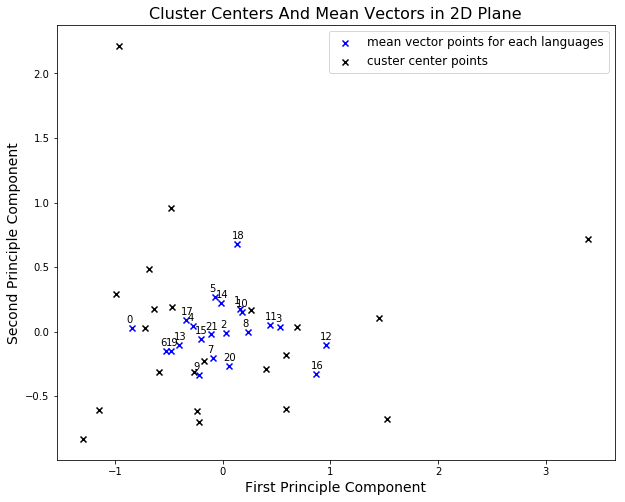

In [3]:
def iaml01cw2_q3_2():
    Xtrn,Ytrn,Xtst,Ytst,language_name,language_label = iaml01cw2_my_helpers.load_language_data()
    plt.figure(figsize=(10,8))
    kmean = KMeans(n_clusters=22,random_state=1).fit(Xtrn)
    centers = kmean.cluster_centers_
    mean_vectors = []
    for i in range(22):
        mean_vectors.append(np.mean(Xtrn[Ytrn==i],axis=0))
    pca_centers = PCA(n_components=2,random_state=1).fit_transform(centers)
    pca_means = PCA(n_components=2,random_state=1).fit_transform(mean_vectors)
    plt.scatter(pca_means[:,0],pca_means[:,1], c="b", marker="x", label="mean vector points for each languages")
    plt.scatter(pca_centers[:,0],pca_centers[:,1], marker="x", c="k", label="custer center points")
    for index,label in enumerate(language_label):
        plt.text(pca_means[index,0]-.05, pca_means[index,1]+.04, label)
    plt.title("Cluster Centers And Mean Vectors in 2D Plane",size=16)
    plt.xlabel("First Principle Component",size=14)
    plt.ylabel("Second Principle Component",size=14)
    plt.legend(fontsize=12)
    plt.savefig("plot/Cluster1.pdf", bbox_inches='tight')
    plt.show()
    return

iaml01cw2_q3_2()

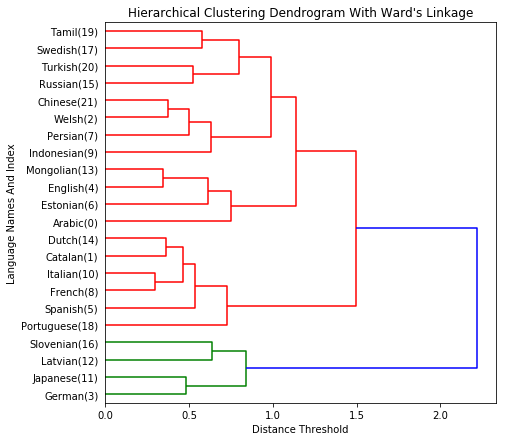

In [4]:
def iaml01cw2_q3_3():
    Xtrn,Ytrn,Xtst,Ytst,language_name,language_label = iaml01cw2_my_helpers.load_language_data()
    mean_vectors = []
    name_labels = [name+"("+num+")" for name,num in zip(language_name,language_label)]
    for i in range(22):
        mean_vectors.append(np.mean(Xtrn[Ytrn==i],axis=0))
    Z = linkage(mean_vectors, 'ward')
    plt.figure(figsize=(7,7))
    dendrogram(Z,orientation="right",labels=name_labels)
    plt.title("Hierarchical Clustering Dendrogram With Ward's Linkage")
    plt.xlabel('Distance Threshold')
    plt.ylabel('Language Names And Index')
    plt.savefig("plot/Cluster2.pdf", bbox_inches='tight')
    plt.show()
    return

iaml01cw2_q3_3()

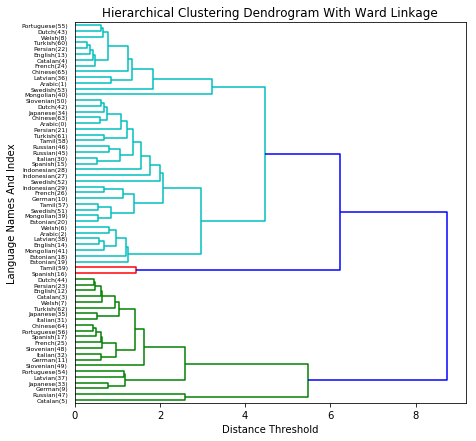

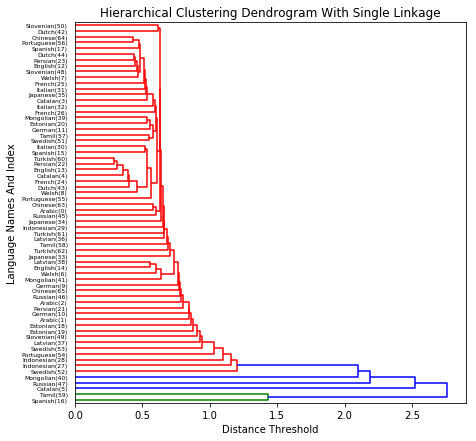

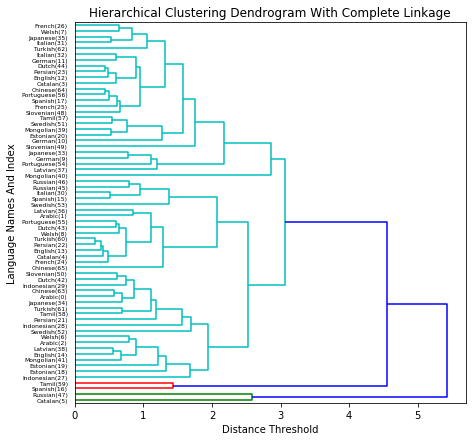

In [5]:
def iaml01cw2_q3_4():
    Xtrn,Ytrn,Xtst,Ytst,language_name,language_label = iaml01cw2_my_helpers.load_language_data()
    language = Xtrn[Ytrn==0]
    kmean = KMeans(n_clusters=3,random_state=1).fit(language)
    language_centers = kmean.cluster_centers_
    names = np.array([[name,name,name] for name in language_name]).flatten()
    labels = np.array([str(i) for i in range(66)])
    name_labels = [name+"("+num+")" for name,num in zip(names,labels)]
    for i in range(1,22):
        language = Xtrn[Ytrn==i]
        kmean = KMeans(n_clusters=3,random_state=1).fit(language)
        centers = kmean.cluster_centers_
        language_centers = np.concatenate((language_centers,centers),axis=0)
    for method in ["ward","single","complete"]:
        Z = linkage(language_centers, method)
        plt.figure(figsize=(7,7))
        dendrogram(Z,orientation="right",labels=name_labels)
        plt.title('Hierarchical Clustering Dendrogram With ' + method.capitalize() + ' Linkage')
        plt.xlabel('Distance Threshold')
        plt.ylabel('Language Names And Index')
        plt.savefig("plot/Cluster-"+ method + ".pdf", bbox_inches='tight')
        plt.show()
    return

iaml01cw2_q3_4()

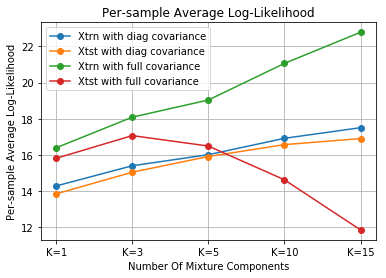

,Per-sample Average Log-Likelihood
training data with diag covariance matrix and K=1,14.28
test data with diag covariance matrix and K=1,13.84
training data with diag covariance matrix and K=3,15.40
test data with diag covariance matrix and K=3,15.04
training data with diag covariance matrix and K=5,16.01
test data with diag covariance matrix and K=5,15.91
training data with diag covariance matrix and K=10,16.92
test data with diag covariance matrix and K=10,16.57
training data with diag covariance matrix and K=15,17.50
test data with diag covariance matrix and K=15,16.90


In [6]:
def iaml01cw2_q3_5():
    Xtrn,Ytrn,Xtst,Ytst,language_name,language_label = iaml01cw2_my_helpers.load_language_data()
    train_scores = {}
    test_scores = {}
    table = {}
    train_data = Xtrn[Ytrn==0]
    test_data = Xtst[Ytst==0]
    types = ["diag","full"]
    ks = [1,3,5,10,15]
    for cov in types:
        train_scores[cov] = []
        test_scores[cov] = []
        for k in ks:
            gmm = GaussianMixture(n_components=k,covariance_type=cov,random_state=1)
            gmm.fit(train_data)
            train_score = gmm.score(train_data)
            test_score = gmm.score(test_data)
            train_scores[cov].append(train_score)
            test_scores[cov].append(test_score)
            table["training data with " + cov + " covariance matrix and K=" + str(k)] = format(round(train_score,2),'.2f')
            table["test data with " + cov + " covariance matrix and K=" + str(k)] = format(round(test_score,2),'.2f')
        plt.plot(np.linspace(1,15,5),train_scores[cov],'o-',label="Xtrn with " + cov + " covariance")
        plt.plot(np.linspace(1,15,5),test_scores[cov],'o-',label="Xtst with " + cov + " covariance")
    plt.title("Per-sample Average Log-Likelihood")
    plt.ylabel("Per-sample Average Log-Likelihood")
    plt.xlabel("Number Of Mixture Components")
    ks_label = ["K="+str(k) for k in ks]
    plt.xticks(np.linspace(1,15,5),ks_label)
    plt.legend()
    plt.grid()
    plt.savefig("plot/Mixture.pdf", bbox_inches='tight')
    plt.show()
    return pd.DataFrame.from_dict(table, orient='index',columns=["Per-sample Average Log-Likelihood"])

iaml01cw2_q3_5()